In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from collections import deque

In [2]:
env = gym.make('MountainCar-v0', render_mode="rgb_array").env

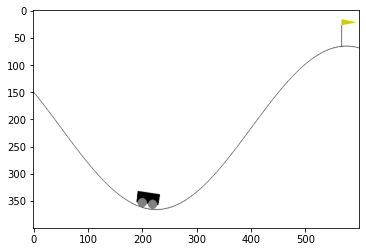

In [4]:
env.reset()
env_screen = env.render()
env.close()

plt.imshow(env_screen)

In [5]:
env.reset()

(array([-0.5144722,  0.       ], dtype=float32), {})

In [6]:
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [7]:
env.observation_space.shape[0]

2

In [8]:
env.action_space.n

3

In [9]:
env.action_space.sample()

2

In [30]:
class DQN:
    def __init__(self, env):
        self.env = env
        self.memory = deque(maxlen=2000)
        self.gamma = 0.03
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.005
        self.tau = 0.125
        self.model = self.create_model()
        self.target_model = self.create_model()
    def create_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=(env.observation_space.shape[0]), activation='relu'))
        model.add(Dense(48, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(env.action_space.n))
        model.compile(loss='mean_squared_error', optimizer=Adam(lr=self.learning_rate))
        return model
    def act(self, state):
        self.epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon_min, self.epsilon)
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.model.predict(state)[0])
    def replay(self):
        batch_size = 32
        if len(self.memory) < batch_size:
            return
        samples = random.sample(self.memory, batch_size)
        for sample in samples:
            state, action, reward, new_state, done = sample
            target = self.target_model.predict(state)
            if done:
                target[0][action] = reward
            else:
                Q_future = max(self.target_model.predict(new_state)[0])
                target[0][action] = reward + Q_future * self.gamma
            self.model.fit(state, target, epochs=1, verbose=1)
    def remember(self, state, action, reward, new_state, done):
        self.memory.append([state, action, reward, new_state, done])
    def target_train(self):
        weights = self.model.get_weights()
        target_weights = self.target_model.get_weights()
        for i in range(len(target_weights)):
            target_weights[i] = weights[i] * self.tau + target_weights[i] * (1 - self.tau)
        self.target_model.set_weights(target_weights)
    def save_model(self, fn):
        self.model.save(fn)

In [31]:
env = gym.make('MountainCar-v0').env
gamma = 0.9
epsilon = 0.95

In [32]:
trails = 1000
trail_len = 500
dqn_agent = DQN(env=env)

C:\Users\Hacker\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
current_state = env.reset()[0].reshape(1, 2)
current_state

array([[-0.59673107,  0.        ]], dtype=float32)

In [34]:
dqn_agent.act(current_state)

1

In [35]:
for trail in range(trails):
    current_state = env.reset()[0].reshape(1, 2)
    for step in range(trail_len):
        print('#', step)
        action = dqn_agent.act(current_state)
        new_state, reward, done, _, _ = env.step(action)
        new_state = new_state.reshape(1, 2)
        dqn_agent.remember(current_state, action, reward, new_state, done)
        dqn_agent.replay()
        dqn_agent.target_train()
        
        current_state = new_state
        if done:
            break
    if step >= 199:
        print('Faild')
    else:
        print('success')
        dqn_agent.save_model('saved_model/Don696')
        break

# 0
None
# 1
None
# 2
None
# 3
None
# 4
None
# 5
None
# 6
None
# 7
None
# 8
None
# 9
None
success
INFO:tensorflow:Assets written to: saved_model/Don696\assets
